Подключим нужные библиотеки

In [2]:
# Математика
import numpy as np
import skfuzzy as fuzz

# Для работы с данным
import pandas as pd

# Это для графиков
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from skfuzzy.control import (Antecedent, Consequent, Rule, ControlSystem, ControlSystemSimulation)

In [3]:
fuzz.__version__

'0.2dev'

Загрузим результаты

In [8]:
results  = pd.read_csv("valid_results.csv", index_col=0)
results

,FolderName,Name,Age,ReadingF0Mean,ReadingF0Std,ReadingJitter,ReadingShimmer,ReadingHFEnergy,ReactionAverage,ReactionMin,...,OperationScore,MemoryTime,MemoryAverageResponseTime,MemoryRemembered,MemoryScore,MemoryStressTime,MemoryStressAverageResponseTime,MemoryStressCorrectCount,MemoryStressWrongCount,MemoryStressScore
Id,,,,,,,,,,,,,,,,,,,,,
3,3-23-05-16,Максим,21,129.119836,50.177899,0.090566,0.212579,-145.354909,319.2,258,...,60.000,67862,2759.222222,18,85,61022,1216.814815,23,4,117
7,7-24-05-16,Максим,21,120.884774,40.923472,0.089282,0.184317,-131.708895,325.5,261,...,70.000,82214,3361.000000,16,74,61018,1102.785714,23,5,115
10,10-25-05-16,Евгений,23,113.334667,30.928611,0.061969,0.164867,-127.579916,366.9,290,...,80.000,42830,2270.166667,12,60,61028,1743.136364,17,5,85
15,15-25-05-16,Анастасия,21,122.267913,23.525760,0.035018,0.118905,-143.526680,375.6,281,...,87.939,72929,3034.500000,18,85,61037,1880.904762,18,3,94
22,22-26-05-16,Денис,21,127.320155,70.626162,0.128426,0.140907,-122.512743,345.1,295,...,30.000,59572,2140.875000,16,78,61014,979.400000,26,4,134
31,31-27-05-16,Бородин Андрей,22,127.073061,51.912211,0.091996,0.139714,-131.354184,375.5,269,...,78.235,64742,2577.833333,18,87,61031,1308.440000,25,0,135
32,32-27-05-16,Денис,21,130.265249,60.233116,0.143990,0.170724,-126.340822,304.2,111,...,60.000,22902,910.181818,11,55,61037,962.000000,30,1,160
33,33-27-05-16,Алексей,20,135.038430,71.149551,0.130323,0.178772,-145.609281,340.6,249,...,50.000,61418,3332.692308,13,63,60939,3581.538462,9,4,43
40,40-29-05-16,Юлия,46,128.985307,56.875177,0.112247,0.173504,-147.574303,547.9,328,...,78.574,67164,2708.944444,18,88,61021,3929.500000,9,3,45


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AE77875F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024AE82114E0>]], dtype=object)

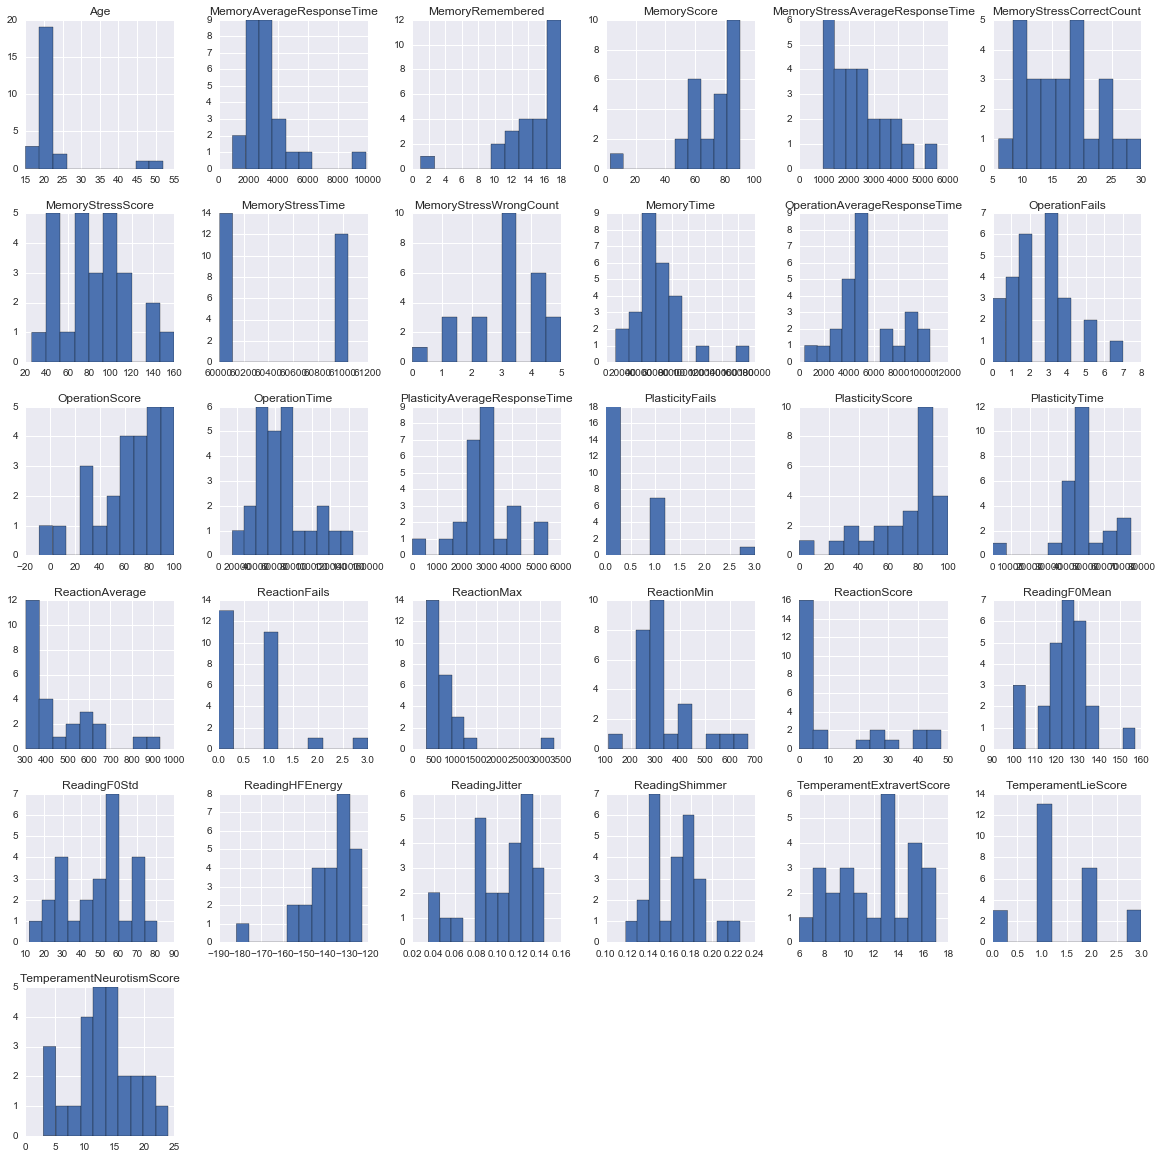

In [5]:
results.hist(figsize=(20,20))

FileNotFoundError: [Errno 2] No such file or directory: 'figures/fuzzy/MemoryStressCorrectCount.png'

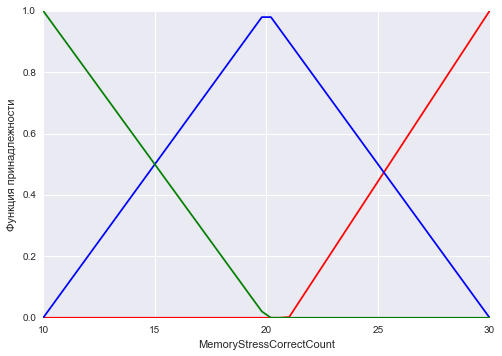

In [6]:
# Диапазон значений параметра, от 10 до 30 (включительно)
mscorrect = np.linspace(10, 30)

# Определим функци принадлежности для параметра MemoryStressCorrectCount
mscorrect_high = fuzz.trimf(mscorrect, [21,30,30])
mscorrect_average = fuzz.trimf(mscorrect, [10,20,30])
mscorrect_low = fuzz.trimf(mscorrect, [10,10,20])

# Построим график
fig, ax = plt.subplots()
ax.plot(mscorrect, mscorrect_high, 'r', label='asd')
ax.plot(mscorrect, mscorrect_average, 'b')
ax.plot(mscorrect, mscorrect_low, 'g')
ax.set_ylabel('Функция принадлежности')
ax.set_xlabel('MemoryStressCorrectCount')
plt.savefig('figures/fuzzy/MemoryStressCorrectCount.png')

C:\Users\boris\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


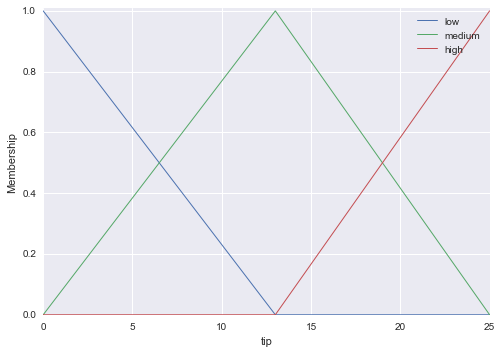

In [34]:
quality = Antecedent(np.arange(0, 11, 1), 'quality')
service = Antecedent(np.arange(0, 11, 1), 'service')
tip = Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

rule1 = Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = Rule(service['average'], tip['medium'])
rule3 = Rule(service['good'] | quality['good'], tip['high'])

tip.view()

In [35]:
tipping_ctrl = ControlSystem([rule1, rule2, rule3])

In [36]:
tipping = ControlSystemSimulation(tipping_ctrl)

In [37]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

19.847607362


C:\Users\boris\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


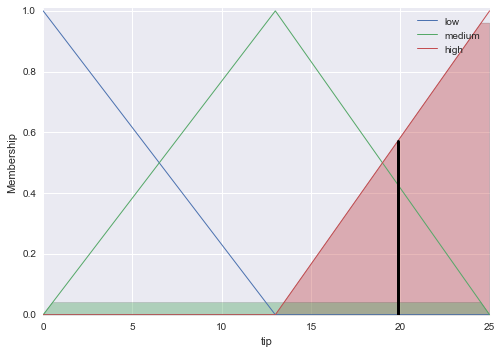

In [38]:
print(tipping.output['tip'])
tip.view(sim=tipping)

In [125]:
extr = Antecedent(np.arange(1, 21, 1), 'Экстраверсия')
extr.automf(3)

neur = Antecedent(np.arange(1, 21, 1), 'Нейротизм')
neur.automf(3)

temp = Consequent(np.arange(0, 26, 1), 'Тип темперамента')
temp.automf(3)

C:\Users\boris\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


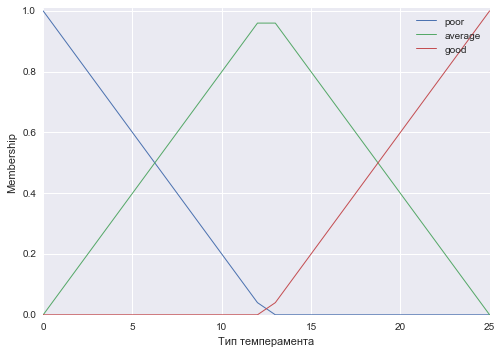

In [126]:
temp.view()

In [144]:
#r1 = Rule(extr['good'], neur['poor'], temp['poor'])
#r2 = Rule(extr['good'], neur['mediocre'], temp['poor'])

r3 = Rule(extr['average'] & neur['average'], temp['average'])
r4 = Rule(extr['poor'] & neur['good'], temp['good'])
r5 = Rule(extr['poor'] & neur['poor'], temp['poor'])
r6 = Rule(extr['poor'] & neur['average'], temp['poor'])

#rule2 = Rule(service['average'], tip['medium'])
#rule3 = Rule(service['good'] | quality['good'], tip['high'])

In [145]:
temp_ctrl = ControlSystem([r3, r4, r5, r6])
temp_sim = ControlSystemSimulation(temp_ctrl)

temp_sim.input['Экстраверсия'] = 2
temp_sim.input['Нейротизм'] = 15

temp_sim.compute()

12.1760560496


C:\Users\boris\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


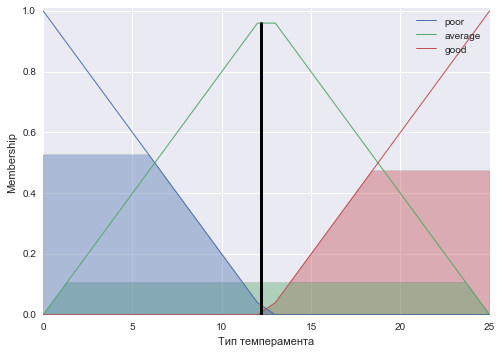

In [146]:
print(temp_sim.output['Тип темперамента'])
temp.view(sim=temp_sim)